In [1]:
import warnings
warnings.simplefilter(action='ignore')

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### 1. 准备 CIFAR-10 数据

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [4]:
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

x_train: (50000, 32, 32, 3)
y_train: (50000, 1)
x_test: (10000, 32, 32, 3)
y_test: (10000, 1)


In [5]:
x_train_normalize = x_train.astype('float32') / 255.0
x_test_normalize = x_test.astype('float32') / 255.0

In [6]:
y_train_one_hot = tf.keras.utils.to_categorical(y_train)
y_test_one_hot = tf.keras.utils.to_categorical(y_test)

In [7]:
y_test_one_hot.shape

(10000, 10)

### 2. 建立模型

#### 2.1 建立 Sequential 模型

In [8]:
model = tf.keras.models.Sequential([
    
    # 卷积层1与池化层1
    tf.keras.layers.Conv2D(input_shape=(32, 32, 3), filters=32, kernel_size=(3, 3), padding='same', activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    # 卷积层2与池化层2
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    # 平坦层
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.25),
    
    # 隐藏层(128个神经元)
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    
    # 输出层
    tf.keras.layers.Dense(10, activation='softmax')
])

#### 2.2 查看模型的摘要

In [9]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0         
__________

### 3. 加载之前训练的模型

In [10]:
try:
    model.load_weights('save_model/model_cifar10_cnn.h5')
    print('加载模型成功! 继续训练模型.')
except:
    print('加载模型失败, 开始训练一个新模型')

加载模型失败, 开始训练一个新模型


### 4. 训练模型

In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
train_history = model.fit(x=x_train_normalize, y=y_train_one_hot, validation_split=0.2,
                         epochs=10, batch_size=128, verbose=2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
 - 94s - loss: 1.5399 - acc: 0.4477 - val_loss: 1.3247 - val_acc: 0.5785
Epoch 2/10
 - 94s - loss: 1.1781 - acc: 0.5793 - val_loss: 1.1671 - val_acc: 0.6141
Epoch 3/10
 - 94s - loss: 1.0313 - acc: 0.6347 - val_loss: 1.0538 - val_acc: 0.6586
Epoch 4/10
 - 93s - loss: 0.9202 - acc: 0.6755 - val_loss: 0.9969 - val_acc: 0.6661
Epoch 5/10
 - 93s - loss: 0.8314 - acc: 0.7067 - val_loss: 0.9409 - val_acc: 0.7016
Epoch 6/10
 - 93s - loss: 0.7516 - acc: 0.7350 - val_loss: 0.8693 - val_acc: 0.7119
Epoch 7/10
 - 93s - loss: 0.6788 - acc: 0.7619 - val_loss: 0.8355 - val_acc: 0.7244
Epoch 8/10
 - 94s - loss: 0.6024 - acc: 0.7891 - val_loss: 0.8053 - val_acc: 0.7333
Epoch 9/10
 - 95s - loss: 0.5279 - acc: 0.8146 - val_loss: 0.8017 - val_acc: 0.7266
Epoch 10/10
 - 94s - loss: 0.4718 - acc: 0.8355 - val_loss: 0.7983 - val_acc: 0.7293


### 5. 以图形显示训练过程

In [13]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.xlabel('Epoch')
    plt.ylabel(train)
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

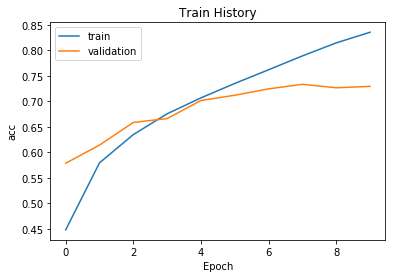

In [14]:
show_train_history(train_history, 'acc', 'val_acc')

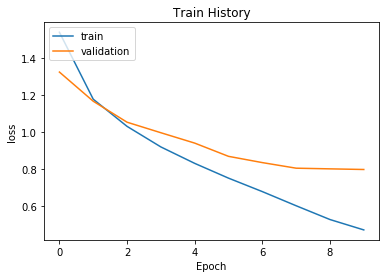

In [15]:
show_train_history(train_history, 'loss', 'val_loss')

### 6. 评估模型的准确率

In [16]:
scores = model.evaluate(x_test_normalize, y_test_one_hot)
print()
print('accuracy:', scores[1])

10000/10000 [==============================] - 7s 693us/step

accuracy: 0.7254


### 7. 进行预测

#### 7.1 执行预测

In [17]:
predictions = model.predict_classes(x_test_normalize)

#### 7.2 预测结果

In [18]:
predictions[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1])

#### 7.3 定义函数以显示10项预测结果

In [19]:
label_dict = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
}

In [20]:
def plot_images_labels_prediction(images, labels, predictions, idx, num=10):
    """
    images: 图像数组
    labels: 真实值数组, 其实每个元素的数字代表一种图像类别的名称
    predictions: 预测结果数据
    idx: 开始显示的数据index
    num: 要显示的数据项数, 默认为10, 不超过25
    """
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num > 25:
        num = 25
    for i in range(0, num):
        ax = plt.subplot(5, 5, i+1)
        ax.imshow(images[idx], cmap='binary')
        title = str(labels[idx][0]) + ',' + label_dict[labels[idx][0]]
        if len(predictions) > 0:
            title += '=>' + label_dict[predictions[idx]]
        ax.set_title(title, fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
        idx += 1
    plt.show()

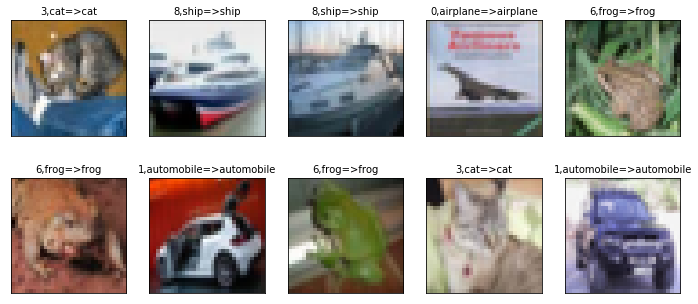

In [21]:
plot_images_labels_prediction(x_test, y_test, predictions, idx=0, num=10)

### 8. 查看预测概率

#### 8.1 使用测试数据进行预测

In [22]:
predicted_probability = model.predict(x_test_normalize)

#### 8.2 建立 show_predicted_probability 函数以相看预测概率

In [23]:
def show_predicted_probability(x, y, predictions, predicted_probability, idx):
    print('label:', label_dict[y[idx][0]])
    print('predict:', label_dict[predictions[idx]])
    plt.figure(figsize=(2, 2))
    plt.imshow(x[idx].reshape((32, 32, 3)))
    plt.show()
    for j in range(10):
        print(label_dict[j], ':', predicted_probability[idx][j])

#### 8.3 查看第0项数据预测的概率

label: cat
predict: cat


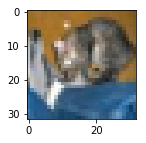

airplane : 0.0039044837
automobile : 0.009814439
bird : 0.011785377
cat : 0.5836158
deer : 0.011877953
dog : 0.34001246
frog : 0.014927296
horse : 0.0033384464
ship : 0.01755957
truck : 0.0031641857


In [24]:
show_predicted_probability(x_test, y_test, predictions, predicted_probability, 0)

#### 8.4 查看第3项数据预测的概率

label: airplane
predict: airplane


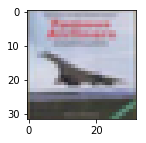

airplane : 0.48062932
automobile : 0.003105312
bird : 0.2798591
cat : 0.0024371676
deer : 0.03524343
dog : 8.478916e-05
frog : 0.0015711904
horse : 0.00014148484
ship : 0.19596696
truck : 0.0009613181


In [25]:
show_predicted_probability(x_test, y_test, predictions, predicted_probability, 3)

### 9. 显示混淆矩阵

#### 9.1 查看预测结果的形状

In [26]:
print('predictons shape:', predictions.shape)

predictons shape: (10000,)


#### 9.2 查看测试 label 真实值的形状

In [27]:
print('y_test shape:', y_test.shape)
print(y_test)

y_test shape: (10000, 1)
[[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]


#### 9.3 将测试 label 真实值转换为一维数据

In [28]:
y_test.reshape(-1)

array([3, 8, 8, ..., 5, 1, 7])

#### 9.4 建立混淆矩阵

In [29]:
pd.crosstab(y_test.reshape(-1), predictions, rownames=['label'], colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,763,10,54,23,26,4,21,13,53,33
1,16,795,13,17,9,11,22,6,20,91
2,55,2,617,56,117,58,59,24,7,5
3,16,3,60,567,104,154,70,16,5,5
4,10,2,58,42,787,15,53,25,6,2
5,2,1,45,209,91,587,35,25,2,3
6,4,2,41,55,48,8,838,3,0,1
7,16,0,36,47,111,40,12,733,3,2
8,47,32,28,21,18,13,12,1,806,22


In [30]:
print(label_dict)

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


### 10. 保存模型

#### 10.1 保存为 json

In [31]:
model_json = model.to_json()
with open('save_model/model_cifar10_cnn.json', 'w') as json_file:
    json_file.write(model_json)

#### 10.2 保存为 yaml

In [32]:
model_yaml = model.to_yaml()
with open('save_model/model_cifar10_cnn.yaml', 'w') as yaml_file:
    yaml_file.write(model_yaml)

#### 10.3 保存为 h5

In [33]:
model.save_weights('save_model/model_cifar10_cnn.h5', save_format='h5')
print('模型已保存到:', 'save_model/model_cifar10_cnn.h5')

模型已保存到: save_model/model_cifar10_cnn.h5
